In [217]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [218]:
!ls "/gdrive/My Drive/CPS_ML"

dataset


## **Load DataSet**

In [219]:
import numpy as np
import pandas as pd

df = pd.read_csv("/gdrive/MyDrive/CPS_ML/dataset/dataset_training.csv")
df

# deleting 'url' column
df2 = df.drop(columns=['url'])
df2

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


## Remove features that cannot be identified by URL only

In [220]:
# # List of features that are difficult to obtain using just the URL
# hard_to_obtain_features = [
#     'domain_registration_length', 'domain_age', 'whois_registered_domain', 'login_form',
#     'external_favicon', 'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia',
#     'sfh', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
#     'domain_in_title', 'domain_with_copyright', 'web_traffic', 'google_index', 'page_rank',
#     'dns_record', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
#     'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection',
#     'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors', 'random_domain',
#     'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
#     'suspecious_tld'
# ]

# # Assuming df2 is the DataFrame containing all features
# df3 = df2.drop(columns=hard_to_obtain_features, errors='ignore')

# print(df3.shape)
# df3

## Features that can be used for maximum use

In [221]:
import pandas as pd

# List of attributes that can only be obtained by URL
url_based_features = [
    'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and',
    'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon',
    'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash',
    'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
    'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix',
    'shortening_service', 'path_extension', 'length_words_raw', 'char_repeat', 'shortest_words_raw',
    'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host',
    'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path'
]

# List of attributes that can be obtained through HTML parsing
html_parsing_features = [
    'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
    'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors', 'login_form',
    'external_favicon', 'links_in_tags', 'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh',
    'iframe', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
    'domain_in_title', 'domain_with_copyright'
]

# 외부 서비스 조회가 필요한 특성 목록
external_service_features = ['google_index', 'page_rank']

#
status_features = ['status']

# 모든 특성 목록을 합치기
all_features = url_based_features + html_parsing_features + external_service_features + status_features

df3 = df2[all_features]
df3

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,0,100.000000,0,0,0,1,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,0,100.000000,0,0,0,1,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,0,62.500000,0,0,0,1,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,0.000000,0,0,0,0,1,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,0,0,6,legitimate
11426,84,18,0,5,0,1,1,0,0,1,...,0,0.000000,0,0,0,1,0,1,0,phishing
11427,105,16,1,2,6,0,1,0,0,1,...,0,80.000000,0,0,0,0,0,1,10,legitimate
11428,38,30,0,2,0,0,0,0,0,0,...,0,0.000000,0,0,0,1,0,0,4,legitimate


## Set X, y

In [222]:
X = df3.drop(columns=['status'])
y = df3['status']
X.shape

(11430, 73)

## **RandomForest**

* Adjusts hyperparameters [n_estimators, max_depth]
* Add the oob_score hyperparameter, and check for overfitting
* Remove features with lower importance than the threshold

### - Training

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the initial RandomForest model
rf_model_initial = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, oob_score=True)
rf_model_initial.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model_initial.feature_importances_
features = X.columns

# Organize feature importances into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Set importance threshold
threshold = 0.01
high_importance_features = importance_df[importance_df['Importance'] > threshold]['Feature']

# Filter data to keep only high-importance features
X_train_filtered = X_train[high_importance_features]
X_test_filtered = X_test[high_importance_features]

# Train a new RandomForest model with filtered data
rf_model_filtered = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=42, oob_score=True)
rf_model_filtered.fit(X_train_filtered, y_train)

# Make predictions and evaluate performance
y_pred_filtered = rf_model_filtered.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
classification_rep_filtered = classification_report(y_test, y_pred_filtered)

# Display results
print(f"Accuracy after removing low-importance features: {accuracy_filtered*100:.2f}%")
print("OOB Score after filtering:", rf_model_filtered.oob_score_)
print("\nClassification Report after filtering:\n", classification_rep_filtered)

# Display the filtered importance DataFrame with high-importance features only
print("Filtered Importance DataFrame:")
print(importance_df[importance_df['Importance'] > threshold])

Accuracy after removing low-importance features: 95.36%
OOB Score after filtering: 0.9583333333333334

Classification Report after filtering:
               precision    recall  f1-score   support

  legitimate       0.95      0.96      0.95      1157
    phishing       0.96      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286

Filtered Importance DataFrame:
                 Feature  Importance
71          google_index    0.164017
72             page_rank    0.138689
47         nb_hyperlinks    0.097996
20                nb_www    0.052812
49   ratio_extHyperlinks    0.036993
43     longest_word_path    0.028205
48   ratio_intHyperlinks    0.027401
65           safe_anchor    0.027243
58         links_in_tags    0.027023
0             length_url    0.023402
25      ratio_digits_url    0.022758
53  ratio_extRedirection    0.021850
41     longest_wor

### - Visible to graph whether overfitting or not


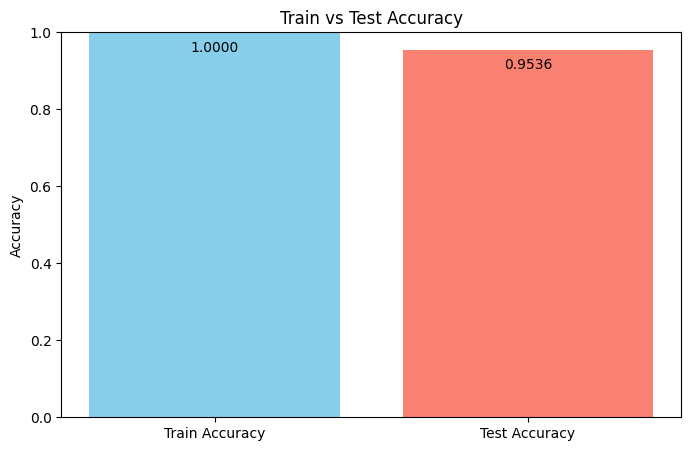

In [224]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on training and test data and calculate accuracy
y_train_pred = rf_model_filtered.predict(X_train_filtered)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = rf_model_filtered.predict(X_test_filtered)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Visualize accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.4f}", ha='center')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.4f}", ha='center')
plt.show()

## **LogisiticRegression**

- To prevent overfitting, features with high ***correlation*** are removed by adjusting the ***threshold***
* Adjusts hyperparameters ***max_iter, C***
* Check the overfitting


### - Remove highly correlated features

In [225]:
import pandas as pd

# Compute correlation matrix
corr_matrix = X.corr().abs()  # Calculate using absolute values of correlation

# Set correlation threshold
threshold = 0.6

# Initialize a set to hold features to be dropped
features_to_drop = set()

# Check only the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        # Identify feature pairs with correlation above the threshold
        if corr_matrix.iloc[i, j] >= threshold:
            colname1 = corr_matrix.index[i]
            colname2 = corr_matrix.columns[j]

            # Add one of the features in the pair to the drop list
            if colname1 not in features_to_drop:
                features_to_drop.add(colname2)
            else:
                features_to_drop.add(colname1)

# Drop highly correlated features from the original DataFrame
X_reduced = X.drop(columns=features_to_drop)

# Display results
print(f"Removed features: {features_to_drop}")
print(f"Reduced DataFrame shape: {X_reduced.shape}")
print(f"Number of reduced features: {len(features_to_drop)}")

Removed features: {'length_words_raw', 'nb_subdomains', 'longest_word_path', 'abnormal_subdomain', 'nb_eq', 'longest_word_host', 'ratio_digits_url', 'avg_word_path', 'longest_words_raw', 'links_in_tags', 'avg_word_host'}
Reduced DataFrame shape: (11430, 62)
Number of reduced features: 11


In [226]:
# Check reduced X
X_reduced

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,...,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,0,100.000000,0,0,0,1,0,1,2
2,126,50,1,4,1,0,1,2,0,2,...,0,0,100.000000,0,0,0,1,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,0,62.500000,0,0,0,1,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,6
11426,84,18,0,5,0,1,1,0,0,0,...,0,0,0.000000,0,0,0,1,0,1,0
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,80.000000,0,0,0,0,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,...,0,0,0.000000,0,0,0,1,0,0,4


### - Training

In [227]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display shapes of reduced feature matrix and target vector
print(f"Shape of X: {X_reduced.shape}")
print(f"Shape of y: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
RL_model = LogisticRegression(random_state=42, max_iter=500, C=1.5)
RL_model.fit(X_train, y_train)

# Perform predictions
y_pred = RL_model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Shape of X: (11430, 62)
Shape of y: (11430,)
Accuracy: 93.67%

Confusion Matrix:
[[1633   99]
 [ 118 1579]]

Classification Report:
              precision    recall  f1-score   support

  legitimate       0.93      0.94      0.94      1732
    phishing       0.94      0.93      0.94      1697

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



### Visible to graph whether overfitting or not

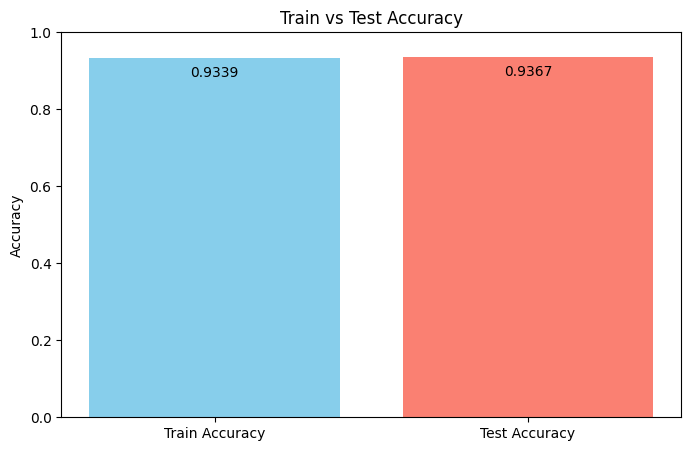

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on training and test data and calculate accuracy
y_train_pred = RL_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = RL_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Visualize accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.4f}", ha='center')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.4f}", ha='center')
plt.show()

In [229]:
import pandas as pd
import re
import urllib.parse

def extract_basic_url_features(url):
    # Parse the URL
    parsed_url = urllib.parse.urlparse(url)
    hostname = parsed_url.hostname or ''
    path = parsed_url.path or ''

    # Extract features using only URL information
    features = {
        'length_url': len(url),
        'length_hostname': len(hostname),
        'ip': 1 if re.match(r'^\d{1,3}(\.\d{1,3}){3}$', hostname) else 0,
        'nb_dots': url.count('.'),
        'nb_hyphens': url.count('-'),
        'nb_at': url.count('@'),
        'nb_qm': url.count('?'),
        'nb_and': url.count('&'),
        'nb_or': url.count('|'),
        'nb_eq': url.count('='),
        'nb_underscore': url.count('_'),
        'nb_tilde': url.count('~'),
        'nb_percent': url.count('%'),
        'nb_slash': url.count('/'),
        'nb_star': url.count('*'),
        'nb_colon': url.count(':'),
        'nb_comma': url.count(','),
        'nb_semicolumn': url.count(';'),
        'nb_dollar': url.count('$'),
        'nb_space': url.count(' '),
        'nb_www': url.count('www'),
        'nb_com': url.count('.com'),
        'nb_dslash': url.count('//'),
        'http_in_path': 1 if 'http' in path else 0,
        'https_token': 1 if 'https' in hostname else 0,
        'ratio_digits_url': sum(c.isdigit() for c in url) / len(url) if len(url) > 0 else 0,
        'ratio_digits_host': sum(c.isdigit() for c in hostname) / len(hostname) if len(hostname) > 0 else 0,
        'punycode': 1 if 'xn--' in hostname else 0,
        'port': parsed_url.port or 80,
        'tld_in_path': 1 if re.search(r'\.\w+', path) else 0,
        'tld_in_subdomain': 1 if re.search(r'\.\w+', parsed_url.hostname.split('.')[0]) else 0,
        'abnormal_subdomain': 1 if len(parsed_url.hostname.split('.')) > 3 else 0,
        'nb_subdomains': len(parsed_url.hostname.split('.')) - 2 if parsed_url.hostname else 0,
        'prefix_suffix': 1 if '-' in hostname else 0,
        'shortening_service': 1 if re.search(r'bit\.ly|goo\.gl|tinyurl\.com', hostname) else 0,
        'path_extension': path.split('.')[-1] if '.' in path else '',
        'length_words_raw': len(path.split('/')),
        'shortest_words_raw': min([len(word) for word in path.split('/') if word]) if path.split('/') else 0,
        'shortest_word_host': min([len(word) for word in hostname.split('.') if word]) if hostname.split('.') else 0,
        'shortest_word_path': min([len(word) for word in path.split('/') if word]) if path.split('/') else 0,
        'longest_words_raw': max([len(word) for word in path.split('/') if word]) if path.split('/') else 0,
        'longest_word_host': max([len(word) for word in hostname.split('.') if word]) if hostname.split('.') else 0,
        'longest_word_path': max([len(word) for word in path.split('/') if word]) if path.split('/') else 0,
        'avg_words_raw': sum([len(word) for word in path.split('/') if word]) / len([word for word in path.split('/') if word]) if len([word for word in path.split('/') if word]) > 0 else 0,
        'avg_word_host': sum([len(word) for word in hostname.split('.') if word]) / len([word for word in hostname.split('.') if word]) if len([word for word in hostname.split('.') if word]) > 0 else 0,
        'avg_word_path': sum([len(word) for word in path.split('/') if word]) / len([word for word in path.split('/') if word]) if len([word for word in path.split('/') if word]) > 0 else 0
    }

    return features

# Sample DataFrame with URLs
df = pd.DataFrame({
    'url': [
        'http://www.example.com/test?query=example',
        'https://bit.ly/3example',
        'http://sub.example.co.uk/path/to/resource',
        'https://www.test-site.org/page',
        'http://123.45.67.89/sample/path'
    ]
})

# Apply the function to extract features
feature_df = df['url'].apply(lambda x: pd.Series(extract_basic_url_features(x)))

# Combine original DataFrame with the new features
result_df = pd.concat([df, feature_df], axis=1)

# Display the result
result_df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,length_words_raw,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path
0,http://www.example.com/test?query=example,41,15,0,2,0,0,1,0,0,...,2,4,3,4,4,7,4,4.000000,4.333333,4.000000
1,https://bit.ly/3example,23,6,0,1,0,0,0,0,0,...,2,8,2,8,8,3,8,8.000000,2.500000,8.000000
2,http://sub.example.co.uk/path/to/resource,41,17,0,3,0,0,0,0,0,...,4,2,2,2,8,7,8,4.666667,3.500000,4.666667
3,https://www.test-site.org/page,30,17,0,2,1,0,0,0,0,...,2,4,3,4,4,9,4,4.000000,5.000000,4.000000
4,http://123.45.67.89/sample/path,31,12,1,3,0,0,0,0,0,...,3,4,2,4,6,3,6,5.000000,2.250000,5.000000
